![uc3m](img/uc3m.jpg)

# Portfolio Optimization

<a href="http://www.est.uc3m.es/nogales" target="_blank">Javier Nogales</a>

The problem is the basis of an investment theory where risk-averse investors can construct portfolios to maximize expected return based on a given level of market risk. It is one of the most important and influential economic theories that quantifies the benefits of **diversification**, also known as *not putting all of your eggs in one basket*

![s](img/strategy.jpg)

## Summary

An investor has $n$ available assets to invest her money. The return for each asset is denoted by $R_i$ 


The decision variables are denoted by $x$, where each $x_i$ denotes the portfolio weight for investment $i$

The portfolio optimization model is:


<img src="img/portfolio.png" width="500">



## Download data automatically from Yahoo Finance

First, you need to install pandas_datareader and yfinance

    conda install -c anaconda pandas-datareader
    pip install yfinance


In [1]:
import pandas_datareader.data as web
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#list of stocks in portfolio

# Enter here your favourite stocks in alphabetical order
stocks = ['AAPL','AMZN','GOOG','MSFT']

# You can add much more assets (bonds, currencies, commodities, ETFs, etc.)
# '^TNX': Treasury Yield 10 Years
# 'BTC-USD': Bitcoin USD
# 'GC=F': Gold
# 'SPY': S&P500 ETF
# 'TEF.MC': Telefónica, Spain
    

# Download automatically daily prices for each of the stocks from our desired starting date 
data = web.DataReader(stocks,data_source='yahoo',start='01/01/2020')['Adj Close']
data.sort_index(inplace=True)

# Adjusted Close is the close price that adjusts the price for dividends and splits

# Convert stock prices into daily returns
# r(t) = (p(t)-p(t-1))/p(t-1)
returns = data.pct_change() # Convert price into percentage




In [2]:
display(returns)

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2020-01-02,NaN,NaN,NaN,NaN
2020-01-03,-0.009722,-0.012139,-0.004907,-0.012452
2020-01-06,0.007968,0.014886,0.024657,0.002585
2020-01-07,-0.004703,0.002092,-0.000624,-0.009118
2020-01-08,0.016086,-0.007809,0.007880,0.015928
...,...,...,...,...
2022-10-24,0.014803,0.004190,0.014683,0.021188
2022-10-25,0.019338,0.006510,0.019035,0.013792
2022-10-26,-0.019627,-0.040962,-0.096350,-0.077156


We can even download all the companies in the S&P500 index (too expensive)

In [3]:
import yfinance as yf

symbols_table = pd.read_html("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies",
                             header=0)[0]
symbols_table_new = symbols_table.set_index("Symbol")
symbols_table_new["Ticker Yahoo"] = symbols_table_new.index.str.replace(".", "-", regex=False)
symbols = list(symbols_table_new.loc[:, "Ticker Yahoo"])

new_data = yf.download(tickers = symbols,
                        start='2020-01-01',
                        group_by = "column",
                        interval = "1d",
                        auto_ajust = True,
                        threads = True,
                           )

[*********************100%***********************]  502 of 502 completed


In [4]:

display(new_data['Adj Close'])

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2019-12-31,83.742783,28.574404,152.646225,72.039886,77.053635,81.503723,170.589996,82.820442,201.957535,329.809998,...,137.714386,58.942188,59.024544,55.088295,76.240341,95.803070,142.326614,255.440002,47.863808,130.197769
2020-01-02,84.371017,28.982893,151.931381,73.683571,77.932610,81.561241,168.809998,82.906250,201.554718,334.429993,...,142.405029,57.911697,59.971916,55.419270,77.266052,97.172615,141.870209,259.140015,48.343185,131.958679
2020-01-03,83.016365,27.548195,151.940918,72.967194,77.192879,80.535492,166.820007,81.895554,201.219040,331.809998,...,140.292755,58.190212,59.489780,54.805988,77.720833,96.868279,141.499374,256.049988,47.660999,131.978363
2020-01-06,83.261780,27.219410,149.443848,73.548645,77.802071,81.714622,179.039993,82.324631,199.905029,333.709991,...,140.015091,58.106659,59.946537,55.107765,77.217651,96.811211,140.681625,258.010010,47.080215,130.965149
2020-01-07,83.517021,27.119778,147.671127,73.202736,77.358238,81.129852,180.350006,81.866936,195.589111,333.390015,...,140.679504,57.985970,59.455940,55.399803,76.927376,96.982407,140.557999,256.470001,46.794430,131.407776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-24,132.300003,14.100000,176.619995,149.449997,150.889999,150.100006,260.279999,98.290001,275.309998,316.220001,...,56.529999,61.580002,106.599998,29.510000,96.000000,108.769997,109.029999,265.720001,49.779999,149.369995
2022-10-25,134.500000,14.290000,181.399994,152.339996,149.820007,152.770004,264.290009,97.949997,280.609985,323.790009,...,57.439999,62.400002,105.879997,30.309999,98.220001,111.239998,110.730003,274.579987,51.509998,152.300003
2022-10-26,137.690002,14.000000,181.809998,149.350006,152.509995,154.690002,268.250000,98.419998,279.869995,320.480011,...,57.130001,62.570000,107.139999,30.879999,99.070000,112.269997,112.269997,273.179993,50.400002,151.669998


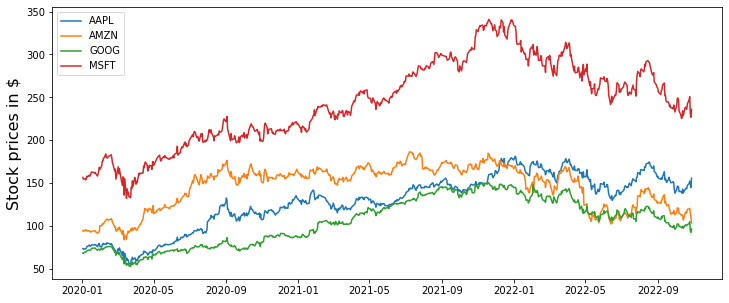

In [5]:
my_stocks = data

# Create and plot the graph
plt.figure(figsize=(12,5)) 

# Loop through each stock and plot the Adj Close for each day
for c in my_stocks.columns.values:
  plt.plot( my_stocks[c],  label=c)#plt.plot( X-Axis , Y-Axis, line_width, alpha_for_blending,  label)

plt.ylabel('Stock prices in $',fontsize=16)
plt.legend(my_stocks.columns.values, loc='upper left')
plt.show()

Note the graph is not very informative because the evolution depends on stock level (AMZN and GOOG are trading at very high levels)

Let's remove the levels and visualize the evolution of $1 in 2020

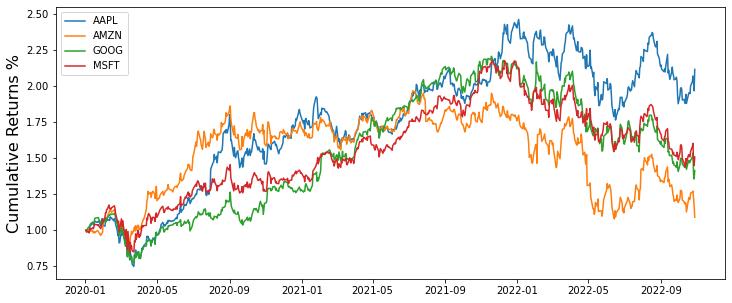

In [6]:
CumReturns = data.apply(lambda x: (x / x[0]))

plt.figure(figsize=(12,5))

# Plot the returns
for c in my_stocks.columns.values: 
    plt.plot(CumReturns[c], label=c)
    
plt.ylabel('Cumulative Returns %',fontsize=16)
plt.legend(my_stocks.columns.values, loc='upper left')
plt.show()    



### Stock performance 

In [7]:
# Annualized mean and sd returns
print('Mean ',252*returns.mean())
print('\nVol ', np.sqrt(252*returns.var())) # Risk is the variance (Volatility)

# Daily VaR at 1% level (maximul loss with 1% probability, or 1%-percentile)
print('\nVaR-1%',returns.quantile(.01)) # How much you could lose

# Sharpe ratio: combine return and risk in just one number
print('\n SR',np.sqrt(252)*returns.mean()/np.sqrt(returns.var()))

# Two conflictive objectives 
# Making money vs Loosing money

Mean  Symbols
AAPL    0.332652
AMZN    0.104466
GOOG    0.180104
MSFT    0.205166
dtype: float64

Vol  Symbols
AAPL    0.367992
AMZN    0.384729
GOOG    0.339853
MSFT    0.346578
dtype: float64

VaR-1% Symbols
AAPL   -0.058431
AMZN   -0.070297
GOOG   -0.054602
MSFT   -0.054052
Name: 0.01, dtype: float64

 SR Symbols
AAPL    0.903964
AMZN    0.271532
GOOG    0.529947
MSFT    0.591975
dtype: float64


Which stock is the best in terms of profit? Would you invest in it?

And in terms of risk? Would you invest in it?

And in terms of SR?

- At the end, what would be your objective function? And your decision variables?

### The efficient frontier view

Text(0, 0.5, 'annual return')

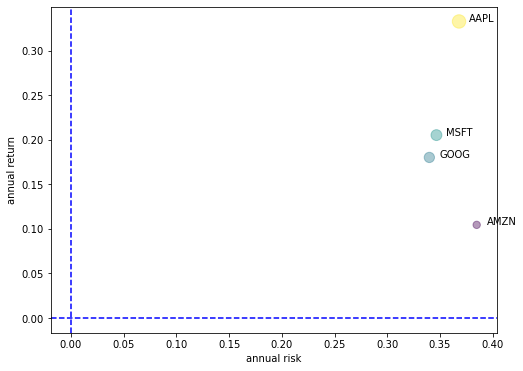

In [8]:
fig, ax = plt.subplots(figsize=(8, 6))
#ax.grid(c = (0.75, 0.75, 0.99))
ax.axhline(y = 0.0,xmin = 0 ,xmax = 1,c = "blue",linewidth = 1.5,zorder = 0,  linestyle = 'dashed')
ax.axvline(x = 0.0,ymin = 0 ,ymax = 1,c = "blue",linewidth = 1.5,zorder = 0,  linestyle = 'dashed')

ax.scatter(np.sqrt(252*returns.var()),252*returns.mean(),s=200*np.sqrt(252)*returns.mean()/np.sqrt(returns.var()),
           c=np.sqrt(252)*returns.mean()/np.sqrt(returns.var()),marker='o',alpha=0.4)

for i, txt in enumerate(returns.columns):
        ax.annotate(txt, (np.sqrt(252*returns.var())[i],252*returns.mean()[i]), xytext=(10,0), textcoords='offset points')
plt.xlabel('annual risk')
plt.ylabel('annual return')

Apple is dominating the other stocks from 2020

To balance better profit/loss and risk, we should diversify: invest in all the stocks

But how?

Let’s say we have an initial portfolio made up of 40% Apple stock, 20% Amazon stock, 20% Google stock and 20% Microsoft

We can calculate the portfolio predicted (expected) return and volatility as follows


In [15]:
# Mean daily return and covariance matrix
# These are very simple predictions for future returns, in practice ML tools can be used with regressors
mean_daily_returns = returns.mean()
cov_matrix = returns.cov()

# Our initial portfolio strategy
weights = np.array([0.4,0.2,0.2,0.2])

# Annualized portfolio return
portfolio_return = round(np.sum(mean_daily_returns * weights) * 252,2)

# Annualized portfolio risk (volatility)
portfolio_std_dev = round(np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) * np.sqrt(252),2)

print('Portfolio annualized return: {} with volatility: {}'.format(portfolio_return,portfolio_std_dev))

print('\nSharpe ratio:',portfolio_return/portfolio_std_dev)

p_daily_returns=np.dot(returns, weights)

print('\nVaR-1%:', np.nanquantile(p_daily_returns,0.01))

Portfolio annualized return: 0.23 with volatility: 0.32

Sharpe ratio: 0.71875

VaR-1%: -0.05543917795128112


Note performance is better balancing return and risk

### But can we even improve this balance?

To do that, we should optimize the trade-off between portfolio return and risk

Note the portfolio risk depends on the covariance matrix

In [10]:
returns.corr()

Symbols,AAPL,AMZN,GOOG,MSFT
Symbols,,,,
AAPL,1.000000,0.647941,0.717404,0.807379
AMZN,0.647941,1.000000,0.667533,0.689557
GOOG,0.717404,0.667533,1.000000,0.820415
MSFT,0.807379,0.689557,0.820415,1.000000


### The optimization model

We will use here scipy for the optimization, but any other package can be used

In [20]:
from scipy.optimize import minimize

mu = mean_daily_returns
covar = cov_matrix

def portfolio(x, mu, covar, gamma):
    return -np.dot(x,mu)+0.5*gamma*np.dot(np.dot(x,covar),x)    

cons = ({'type': 'eq','fun' : lambda x: sum(x)-1})
bounds = ((0, 1), (0, 1), (0, 1), (0, 1))
gamma=10 # risk-aversion parameter, the bigger the more risk averse (but usually better performance)
x0 = np.array([0, 0, 0, 0]) # Mandatory -> non-linear -> many solutions that depend on the initial point

res = minimize(portfolio, x0, args=(mu, covar, gamma), method='SLSQP', constraints=cons, bounds=bounds, options={'disp': True,'ftol': 1e-10})

# Iteration: 19 Steps

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.0011020557187046381
            Iterations: 19
            Function evaluations: 95
            Gradient evaluations: 19


In [21]:
# Our final portfolio strategy
weights = np.array(res.x)

print('Recommended portfolio weights:', np.round(weights,2)) 

# Annualized portfolio return
portfolio_return = round(np.sum(mean_daily_returns * weights) * 252,2)

# Annualized portfolio risk (volatility)
portfolio_std_dev = round(np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) * np.sqrt(252),2)

print('\nPortfolio annualized return: {} with volatility: {}'.format(portfolio_return,portfolio_std_dev))

print('\nSharpe ratio:',portfolio_return/portfolio_std_dev)

p_daily_returns=np.dot(returns, weights)

print('\nVaR-1%:', np.nanquantile(p_daily_returns,0.01))

# 50%

Recommended portfolio weights: [0.52 0.03 0.36 0.09]

Portfolio annualized return: 0.26 with volatility: 0.33

Sharpe ratio: 0.7878787878787878

VaR-1%: -0.052947274050732206


By investing most of our money in AAPL and GOOG, we could have obtained a very good performance from 2020, both in terms of return and risk

Of course this is not realistic, since we are using the same test set as the train one

We should implement a rolling backtesting: train the model (obtain the portfolio weights) using data up to t, and test it (portfolio return) at t+1

### Efficient frontier view of portfolio

Text(0, 0.5, 'annual return')

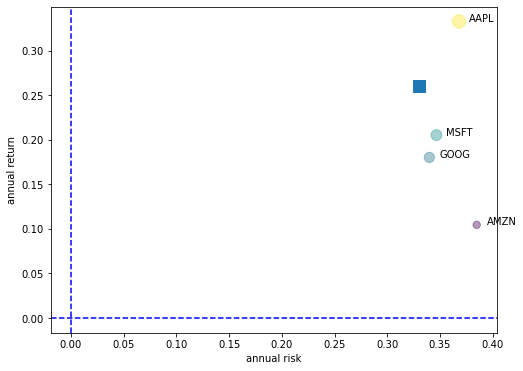

In [22]:
fig, ax = plt.subplots(figsize=(8, 6))
#ax.grid(c = (0.75, 0.75, 0.99))
ax.axhline(y = 0.0,xmin = 0 ,xmax = 1,c = "blue",linewidth = 1.5,zorder = 0,  linestyle = 'dashed')
ax.axvline(x = 0.0,ymin = 0 ,ymax = 1,c = "blue",linewidth = 1.5,zorder = 0,  linestyle = 'dashed')

ax.scatter(np.sqrt(252*returns.var()),252*returns.mean(),s=200*np.sqrt(252)*returns.mean()/np.sqrt(returns.var()),
           c=np.sqrt(252)*returns.mean()/np.sqrt(returns.var()),marker='o',alpha=0.4)

for i, txt in enumerate(returns.columns):
        ax.annotate(txt, (np.sqrt(252*returns.var())[i],252*returns.mean()[i]), xytext=(10,0), textcoords='offset points')

# Portfolio        
ax.scatter(portfolio_std_dev, portfolio_return, s=200*portfolio_return/portfolio_std_dev, marker="s")

plt.xlabel('annual risk')
plt.ylabel('annual return')

Evolution of $1 in 2020 using this portfolio strategy

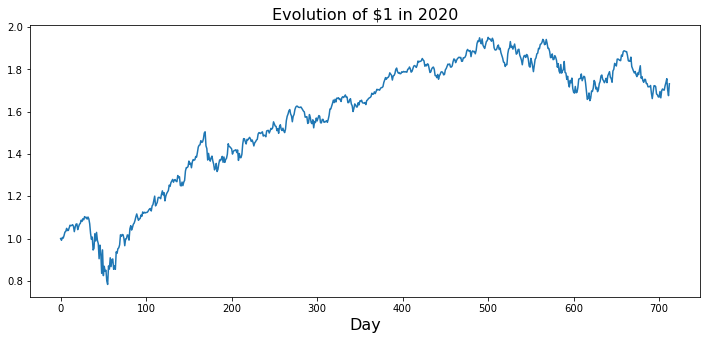

In [23]:
plt.figure(figsize=(12,5))

p_daily_returns[0]=1

# Plot the returns
plt.plot(p_daily_returns.cumsum())
    
plt.title('Evolution of $1 in 2020',fontsize=16)
plt.xlabel('Day',fontsize=16)
plt.show()   

### Interpretation

If we had invested $1 in this portfolio strategy at the beginning of 2020, today we would have 70\% more. On March 2020, we would have lost 10\%.

This is a conservative strategy with $\gamma=10$. You should try other investment strategies changing risk-aversion parameter gamma: the smaller the more risk you take

Finally note this is not a realistic backtest, because we are using the same data to train and test.




### Final notes

Realistic backtesting: 

- take a longer history

- consider the first 100 days to estimate the parameters and compute portfolio weights, $w_0$, using the quadratic model

- leave this strategy for, let's say, one month, and evaluate there the performance: $w_0' R_1$, where $R_1$ contains the one-month ahead returns for the stocks

- compute there the portfolio weights, $w_1$, using now the returns from the last month and removing the first month in the dataset

- repeat many months

You should compare your strategy with relevant benchmarks: 1/N and the index (S&P500)

Take care: portfolio means change a lot along time whereas volatilities and correlations change less and are more smooth. Hence, strategies based on volatilities and correlations tend to perform better

Last advice: past performance does not guarantee future performance



### Other topics

- Instead of the quadratic utility (mean-var), we can use the logarithmic, power utility, etc.

- We can also optimize the Value-at-Risk: later in the course

- Dynamic formulation: decisions made today affect future decisions

- Dynamic risk-measures: volatilities and correlations

- Transaction costs

- Robust portfolios


